In [3]:
import pandas as pd
df=pd.read_csv('amazon.csv')
print(df)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹39

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [33]:
# Cleaning and changing type of price and percentage columns from string to float64

# Prices with "," as thousands separator
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

In [38]:
df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [52]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [54]:
# Cleaning and changing type rating columns from string to float64
# One product has the rating "|", so I searched amazon.in for its actual rating, wich was 3.9

# Update rating of this product
df.loc[df.product_id == "B08L12N5H1", 'rating'] = "3.9"

# Changing type of rating column to float
df['rating'] = df['rating'].astype('float64')

In [56]:
df.head(5)

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 0.64     4.2       24269.0   
1         349.0                 0.43     4.0       43994.0   
2        1899.0                 0.90     3.9        7928.0   
3         699.0                 0.53     4.2       94363.0   
4         399.0                 0.61     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [57]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [4]:
df.describe().T


count unique  \
product_id           1465   1351   
product_name         1465   1337   
category             1465    211   
discounted_price     1465    550   
actual_price         1465    449   
discount_percentage  1465     92   
rating               1465     28   
rating_count         1463   1143   
about_product        1465   1293   
user_id              1465   1194   
user_name            1465   1194   
review_id            1465   1194   
review_title         1465   1194   
review_content       1465   1212   
img_link             1465   1412   
product_link         1465   1465   

                                                                   top freq  
product_id                                                  B07JW9H4J1    3  
product_name         Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...    5  
category             Computers&Accessories|Accessories&Peripherals|...  233  
discounted_price                                                  ₹199   53  
actual_price                                                      ₹999  120  
discount_percentage                                                50%   56  
rating                                                             4.1  244  
rating_count                                                     9,378    9  
about_product        [CHARGE & SYNC FUNCTION]- This cable comes wit...    6  
user_id              AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   10  
user_name            $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   10  
review_id            R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   10  
review_title         Worked on iPhone 7 and didn’t work on XR,Good ...   10  
review_content       I am not big on camera usage, personally. I wa...    8  
img_link             https://m.media-amazon.com/images/I/413sCRKobN...    3  
product_link         https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...    1

C:\Users\91990\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


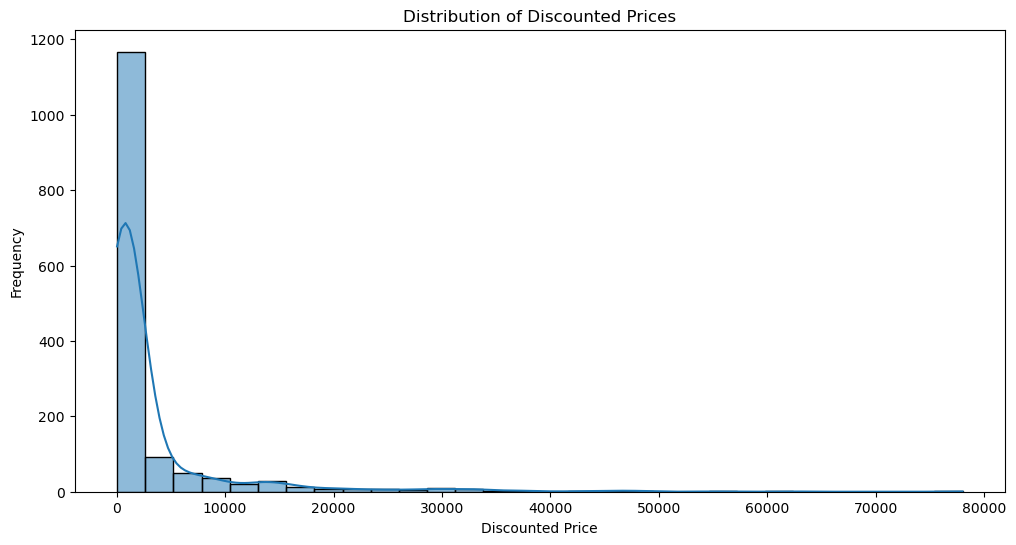

C:\Users\91990\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


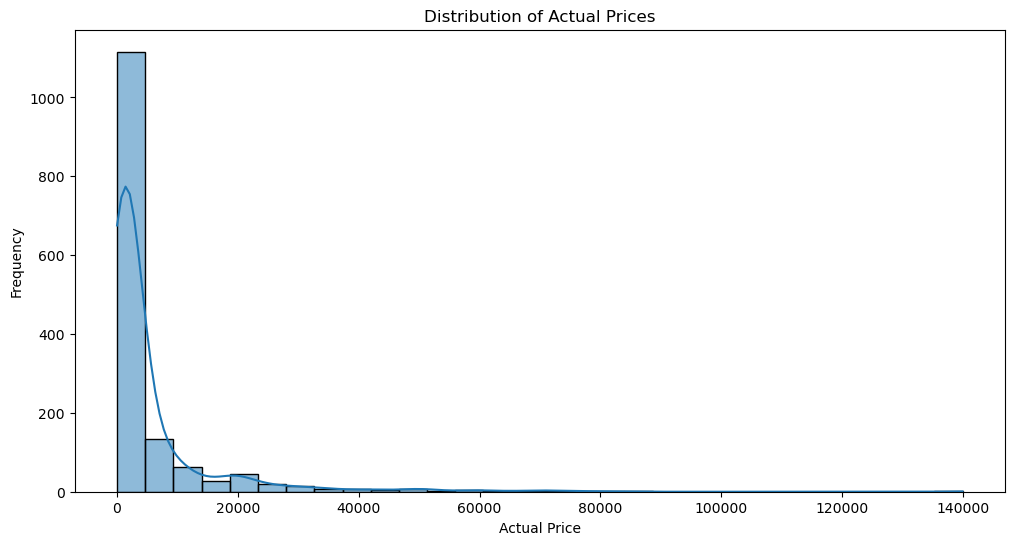

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of discounted prices
plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], bins=30, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of actual prices
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_price'], bins=30, kde=True)
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()


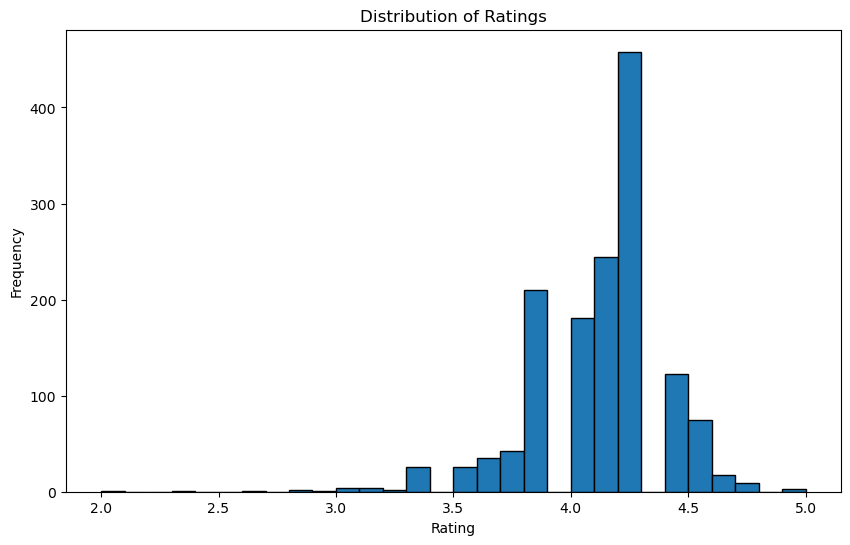

In [83]:
import matplotlib.pyplot as plt

# Create a histogram for the 'rating' column
plt.figure(figsize=(10, 6))
plt.hist(df['rating'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [6]:
df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [7]:
(df['category'].value_counts())

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                             

     product_id                                       product_name  \
347  B01DEWVZ2C  JBL C100SI Wired In Ear Headphones with Mic, J...   

                                              category discounted_price  \
347  Electronics|Headphones,Earbuds&Accessories|Hea...             ₹599   

    actual_price discount_percentage rating rating_count  \
347         ₹999                 40%    4.1     1,92,590   

                                         about_product  \
347  JBL Signature Sound|Lightweight and Comfortabl...   

                                               user_id  \
347  AFE54I72EV2YOL6POJCHHP3Q5NWA,AFKLES3QOCRLIMJWH...   

                                             user_name  \
347  Sunny J.,Praveen Pavitrhran,nitesh,Yadav,vansh...   

                                             review_id  \
347  R2NB2K5XC70FKP,R3623Q21H3MKP6,R1XVC6NEYU3ZHV,R...   

                                          review_title  \
347  Good maybe okay,Defective Product Delivered,Am...   

  

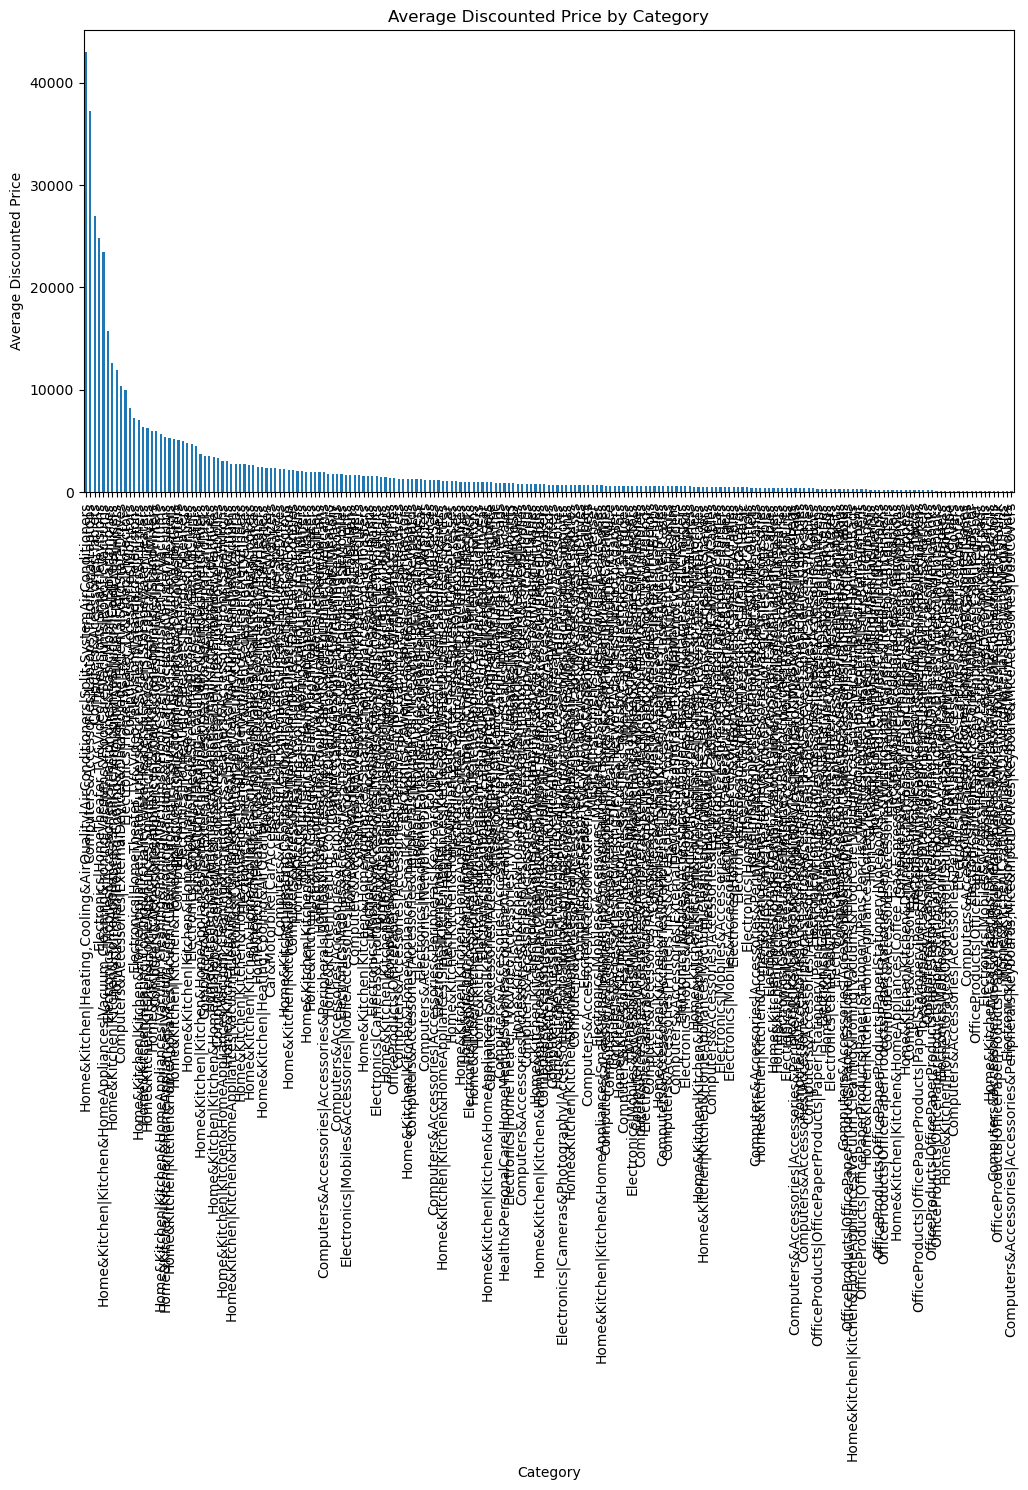

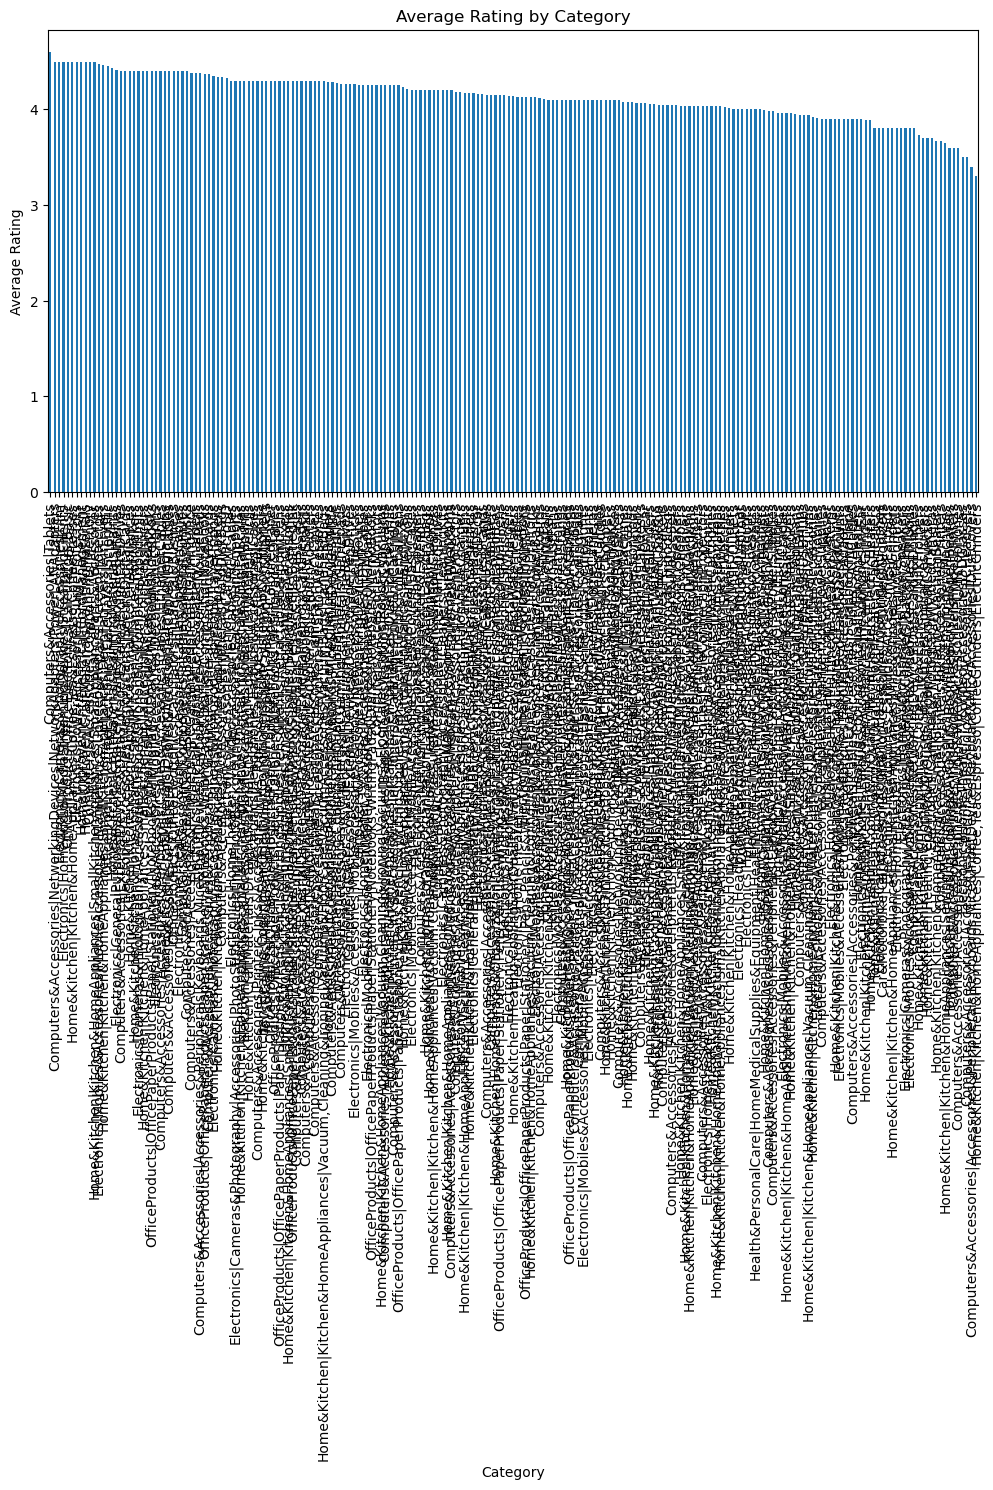

In [87]:
# Performance by category based on mean discounted price
category_performance = df.groupby('category')['discounted_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_performance.plot(kind='bar')
plt.title('Average Discounted Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Discounted Price')
plt.xticks(rotation=90)
plt.show()

# Performance by category based on mean rating
category_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_ratings.plot(kind='bar')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


C:\Users\91990\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



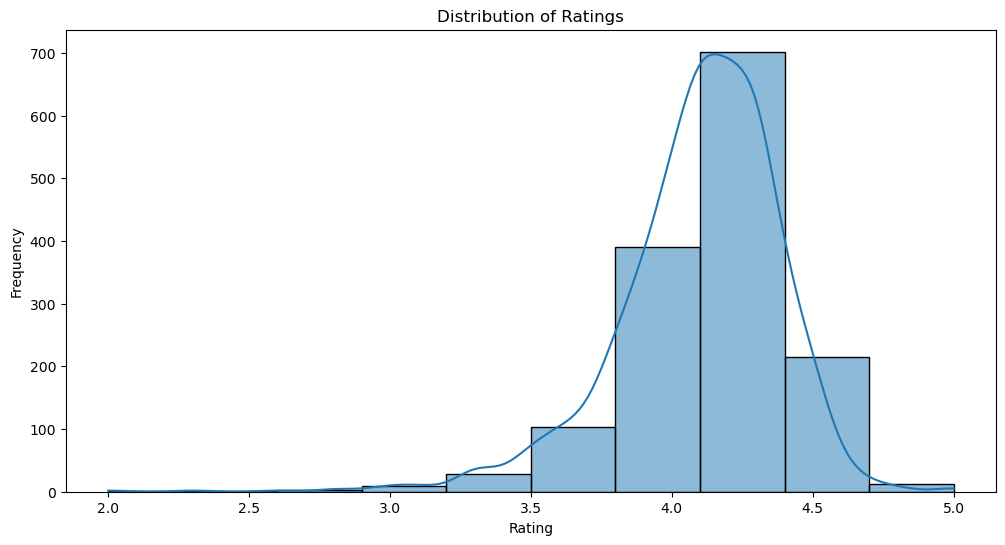

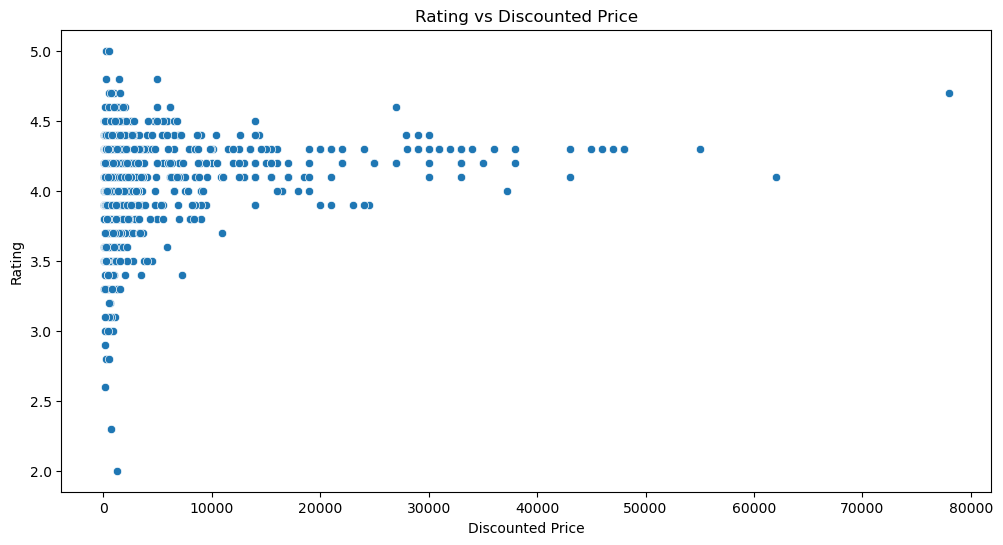

In [88]:
# Distribution of ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Relationship between rating and discounted price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating')
plt.title('Rating vs Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()
